# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
cities

['hobart',
 'hamada',
 'saint-philippe',
 'mar del plata',
 'dikson',
 'rikitea',
 'luwuk',
 'hihifo',
 'taolanaro',
 'mataura',
 'caxito',
 'bud',
 'dingle',
 'new norfolk',
 'ishigaki',
 'aklavik',
 'ponta do sol',
 'butaritari',
 'talnakh',
 'ushuaia',
 'banposh',
 'la ronge',
 'nikolskoye',
 'port alfred',
 'saint george',
 'bredasdorp',
 'atuona',
 'severo-kurilsk',
 'lagoa',
 'bengkulu',
 'illoqqortoormiut',
 'carnarvon',
 'cartagena',
 'ust-kalmanka',
 'shubarkuduk',
 'morgan city',
 'kirovskiy',
 'teruel',
 'hermanus',
 'petrolina',
 'kavaratti',
 'machico',
 'natal',
 'vaini',
 'kavieng',
 'tasiilaq',
 'ouricuri',
 'cape town',
 'athens',
 'nizhneyansk',
 'san patricio',
 'yerbogachen',
 'lovozero',
 'torbay',
 'khatanga',
 'kodiak',
 'esperance',
 'airai',
 'grand river south east',
 'saint-leu',
 'belushya guba',
 'huarmey',
 'kapaa',
 'vestmannaeyjar',
 'spasskoye',
 'afsin',
 'elat',
 'yellowknife',
 'quepos',
 'punta arenas',
 'sambava',
 'castro',
 'gorontalo',
 'lar',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
set_list=1
record=0

cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
city2=[]

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    
    record=record+1
    try:
        print(f"Processing Record {record} of Set {set_list}  | {city}")
        response=requests.get(query_url+city).json()
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city2.append(city)
    except KeyError:
        print("City not found. Skipping...")
    if record==50:
        record=0
        set_list=set_list+1
        time.sleep(50)
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1  | hobart
Processing Record 2 of Set 1  | hamada
Processing Record 3 of Set 1  | saint-philippe
Processing Record 4 of Set 1  | mar del plata
Processing Record 5 of Set 1  | dikson
Processing Record 6 of Set 1  | rikitea
Processing Record 7 of Set 1  | luwuk
Processing Record 8 of Set 1  | hihifo
City not found. Skipping...
Processing Record 9 of Set 1  | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1  | mataura
Processing Record 11 of Set 1  | caxito
Processing Record 12 of Set 1  | bud
Processing Record 13 of Set 1  | dingle
Processing Record 14 of Set 1  | new norfolk
Processing Record 15 of Set 1  | ishigaki
Processing Record 16 of Set 1  | aklavik
Processing Record 17 of Set 1  | ponta do sol
Processing Record 18 of Set 1  | butaritari
Processing Record 19 of Set 1  | talnakh
Processing Record 20 of Set 1  | ushuaia
Processing Record 21 of Set 1  | banposh
Processing Record 22 

Processing Record 34 of Set 4  | puliyur
Processing Record 35 of Set 4  | saint-augustin
Processing Record 36 of Set 4  | tashigang
Processing Record 37 of Set 4  | eyl
Processing Record 38 of Set 4  | saint-pierre
Processing Record 39 of Set 4  | robertsonpet
Processing Record 40 of Set 4  | vanderhoof
Processing Record 41 of Set 4  | aykhal
Processing Record 42 of Set 4  | eenhana
Processing Record 43 of Set 4  | bibiani
Processing Record 44 of Set 4  | ucluelet
Processing Record 45 of Set 4  | itarema
Processing Record 46 of Set 4  | pangnirtung
Processing Record 47 of Set 4  | talcahuano
Processing Record 48 of Set 4  | astana
Processing Record 49 of Set 4  | bethel
Processing Record 50 of Set 4  | hovd
Processing Record 1 of Set 5  | ixtapa
Processing Record 2 of Set 5  | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 5  | belyy yar
Processing Record 4 of Set 5  | el sauzal
Processing Record 5 of Set 5  | vao
Processing Record 6 of Set 5  | buraydah
Processin

Processing Record 23 of Set 8  | rawannawi
City not found. Skipping...
Processing Record 24 of Set 8  | port hardy
Processing Record 25 of Set 8  | antalaha
Processing Record 26 of Set 8  | pushkinskiye gory
Processing Record 27 of Set 8  | longlac
City not found. Skipping...
Processing Record 28 of Set 8  | cururupu
Processing Record 29 of Set 8  | pisco
Processing Record 30 of Set 8  | nizhniy kuranakh
Processing Record 31 of Set 8  | san vicente
Processing Record 32 of Set 8  | montepulciano
Processing Record 33 of Set 8  | oksbol
Processing Record 34 of Set 8  | maceio
Processing Record 35 of Set 8  | lopatino
Processing Record 36 of Set 8  | yarmouth
Processing Record 37 of Set 8  | puerto el triunfo
Processing Record 38 of Set 8  | hit
Processing Record 39 of Set 8  | palu
Processing Record 40 of Set 8  | barth
Processing Record 41 of Set 8  | lasa
Processing Record 42 of Set 8  | polyarnyy
Processing Record 43 of Set 8  | marmarion
Processing Record 44 of Set 8  | tuktoyaktuk
Pr

Processing Record 5 of Set 12  | camocim
Processing Record 6 of Set 12  | bagotville
Processing Record 7 of Set 12  | kirakira
Processing Record 8 of Set 12  | puerto penasco
Processing Record 9 of Set 12  | truro
Processing Record 10 of Set 12  | meulaboh
Processing Record 11 of Set 12  | balkanabat
Processing Record 12 of Set 12  | vallenar
Processing Record 13 of Set 12  | kumylzhenskaya
Processing Record 14 of Set 12  | san cristobal
Processing Record 15 of Set 12  | klyuchi
Processing Record 16 of Set 12  | anori
Processing Record 17 of Set 12  | hualmay
Processing Record 18 of Set 12  | daru
Processing Record 19 of Set 12  | ayagoz
Processing Record 20 of Set 12  | markova
Processing Record 21 of Set 12  | sihora
Processing Record 22 of Set 12  | henties bay
Processing Record 23 of Set 12  | cabedelo
Processing Record 24 of Set 12  | lavrentiya
Processing Record 25 of Set 12  | caravelas
Processing Record 26 of Set 12  | lusambo
Processing Record 27 of Set 12  | rakke
Processing 

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_dic={
    "City":city2,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max_Temp":max_temp,
    "Wind_Speed":wind_speed
}
city_data=pd.DataFrame(city_dic)
city_data.to_csv('city_data.csv')
city_data.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max_Temp      552
Wind_Speed    552
dtype: int64

In [7]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,hobart,100,AU,1578088515,45,-42.88,147.33,71.01,9.17
1,hamada,3,JP,1578088764,49,34.90,132.08,51.01,7.72
2,saint-philippe,90,CA,1578088764,80,45.36,-73.48,42.01,4.92
3,mar del plata,98,AR,1578088764,28,-46.43,-67.52,80.64,34.02
4,dikson,70,RU,1578088764,95,73.51,80.55,-4.72,18.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

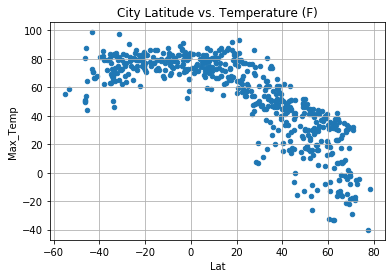

In [8]:
plot=city_data.plot(kind='scatter',x='Lat',y='Max_Temp',grid=True, title="City Latitude vs. Temperature (F)")
fig=plot.get_figure()
plt.show()
fig.savefig(f'../Images/lat_temp_scatter.png')

#### Latitude vs. Humidity Plot

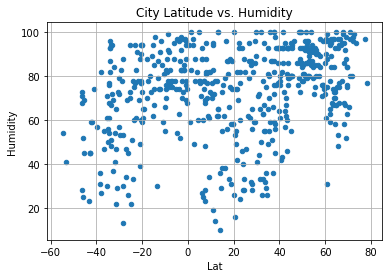

In [9]:
plot=city_data.plot(kind='scatter',x='Lat',y='Humidity',grid=True, title="City Latitude vs. Humidity")
fig=plot.get_figure()
plt.show()
fig.savefig(f'../Images/lat_humidity_scatter.png')

#### Latitude vs. Cloudiness Plot

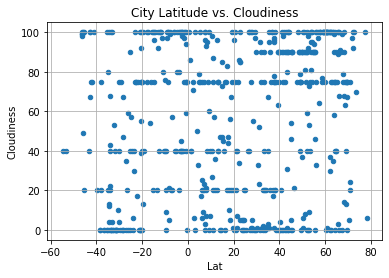

In [10]:
plot=city_data.plot(kind='scatter',x='Lat',y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness")
fig=plot.get_figure()
plt.show()
fig.savefig(f'../Images/lat_cloudiness_scatter.png')

#### Latitude vs. Wind Speed Plot

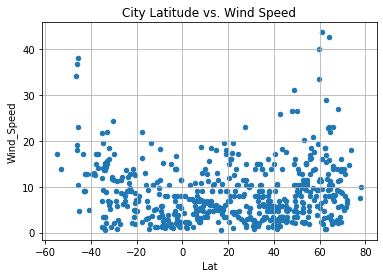

In [11]:
plot=city_data.plot(kind='scatter',x='Lat',y='Wind_Speed',grid=True, title="City Latitude vs. Wind Speed")
fig=plot.get_figure()
plt.show()
fig.savefig(f'../Images/lat_wind_scatter.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linerplot(x,y):
    (slope,intercept,rvalue,_,_)=linregress(x,y)
    fit=(slope*x)+intercept
    fig, ax=plt.subplots()
    ax.scatter(x, y)
    ax.plot(x,fit,c='r')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.text(min(x),min(y),f"y={round(slope,2)}x + {round(intercept,2)}",c='r')
    if min(x)>=0:
        plt.savefig(f'../Images/north_{x.name}_{y.name}_linear_regression.png')
    else:
        plt.savefig(f'../Images/south_{x.name}_{y.name}_linear_regression.png')
    plt.show()
    print(f"The r-squared is : {rvalue}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_cities=city_data.loc[city_data['Lat']>=0]
south_cities=city_data.loc[city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

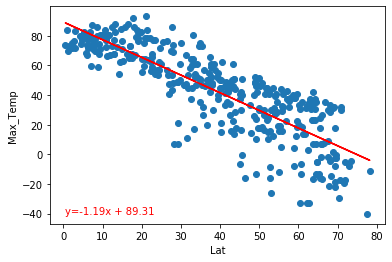

The r-squared is : -0.8319064594001447


In [14]:
linerplot(north_cities['Lat'],north_cities['Max_Temp'])


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

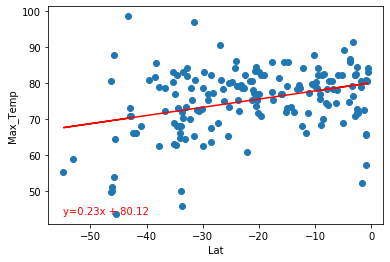

The r-squared is : 0.3414470934720603


In [15]:
linerplot(south_cities['Lat'],south_cities['Max_Temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

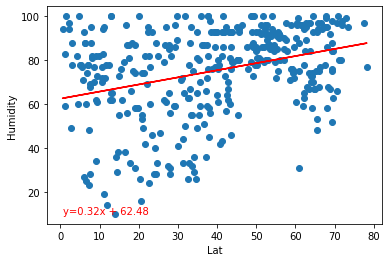

The r-squared is : 0.32673940159083764


In [16]:
linerplot(north_cities['Lat'],north_cities['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

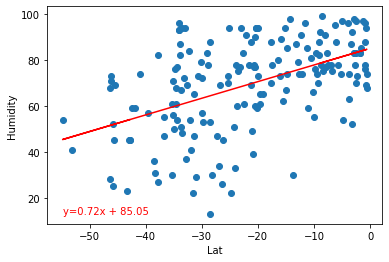

The r-squared is : 0.4973307837517154


In [17]:
linerplot(south_cities['Lat'],south_cities['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

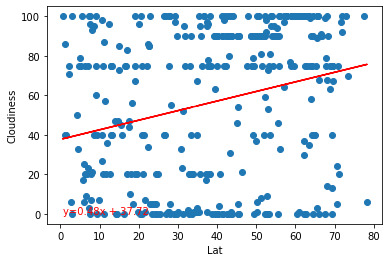

The r-squared is : 0.257183690532148


In [18]:
linerplot(north_cities['Lat'],north_cities['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

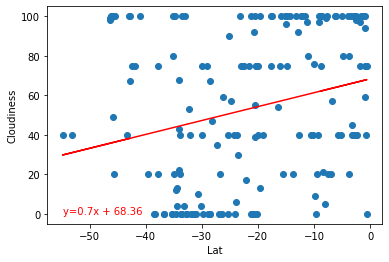

The r-squared is : 0.2515238420379994


In [19]:
linerplot(south_cities['Lat'],south_cities['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

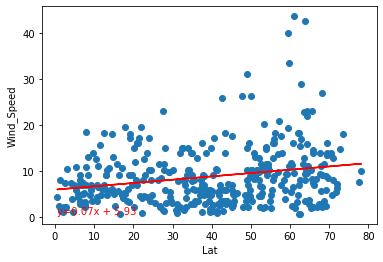

The r-squared is : 0.2268315299516176


In [20]:
linerplot(north_cities['Lat'],north_cities['Wind_Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

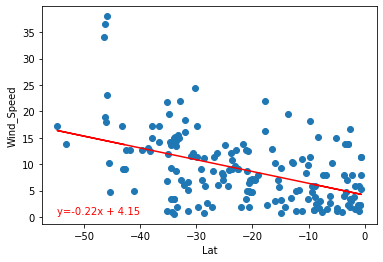

The r-squared is : -0.46226228666576213


In [21]:
linerplot(south_cities['Lat'],south_cities['Wind_Speed'])